In [ ]:
# only in docker
%cd ~/src/laboratori/2324

# **Introduzione al Machine Learning -- laboratorio 23 e 24**

* Analisi della varianza
* Test del chi-quadro

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [2]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = X.copy()
data['class'] = y['class']
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
fg = data.groupby('class')
fg

In [8]:
list(fg)[0][1]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


`df.groupby()` separa in tre df, e ritorna un iteratore a tre tuple del tipo `(nome, df_nome)`.

In [9]:
for x in fg:
    print(x)

('Iris-setosa',     sepal length  sepal width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13  

In [11]:
for name, dafr in fg:
    print(f'\nname: {name}')
    print(dafr)


name: Iris-setosa
    sepal length  sepal width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
1

In [12]:
fg.describe()

sepal length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal width         ... petal length      petal width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [13]:
pwg = fg['petal width']
list(pwg)

[('Iris-setosa',
  0     0.2
  1     0.2
  2     0.2
  3     0.2
  4     0.2
  5     0.4
  6     0.3
  7     0.2
  8     0.2
  9     0.1
  10    0.2
  11    0.2
  12    0.1
  13    0.1
  14    0.2
  15    0.4
  16    0.4
  17    0.3
  18    0.3
  19    0.3
  20    0.2
  21    0.4
  22    0.2
  23    0.5
  24    0.2
  25    0.2
  26    0.4
  27    0.2
  28    0.2
  29    0.2
  30    0.2
  31    0.4
  32    0.1
  33    0.2
  34    0.1
  35    0.2
  36    0.2
  37    0.1
  38    0.2
  39    0.2
  40    0.3
  41    0.3
  42    0.2
  43    0.6
  44    0.4
  45    0.3
  46    0.2
  47    0.2
  48    0.2
  49    0.2
  Name: petal width, dtype: float64),
 ('Iris-versicolor',
  50    1.4
  51    1.5
  52    1.5
  53    1.3
  54    1.5
  55    1.3
  56    1.6
  57    1.0
  58    1.3
  59    1.4
  60    1.0
  61    1.5
  62    1.0
  63    1.4
  64    1.3
  65    1.4
  66    1.5
  67    1.0
  68    1.5
  69    1.1
  70    1.8
  71    1.3
  72    1.5
  73    1.2
  74    1.3
  75    1.4
  76    1.4


In [14]:
data['petal width'][0:10]

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
5    0.4
6    0.3
7    0.2
8    0.2
9    0.1
Name: petal width, dtype: float64

<Axes: ylabel='Density'>

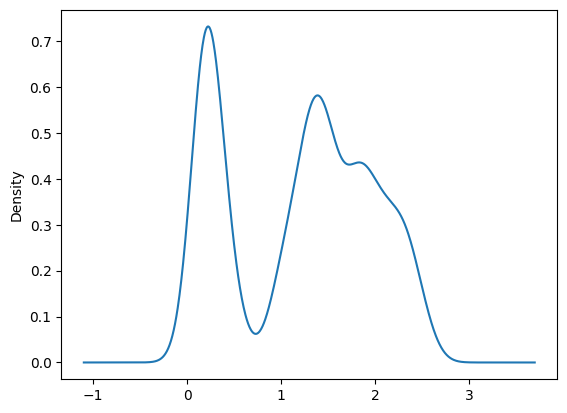

In [18]:
data['petal width'].plot(kind='kde', bw_method=.2)

                 count   mean       std  min  25%  50%  75%  max
class                                                           
Iris-setosa       50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6
Iris-versicolor   50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8
Iris-virginica    50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5


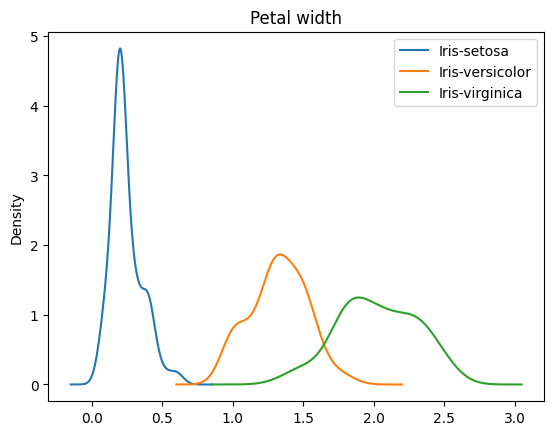

In [19]:
print(pwg.describe())
pwg.plot(kind='kde')
plt.title('Petal width')
plt.legend()
plt.show()

In [21]:
X.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

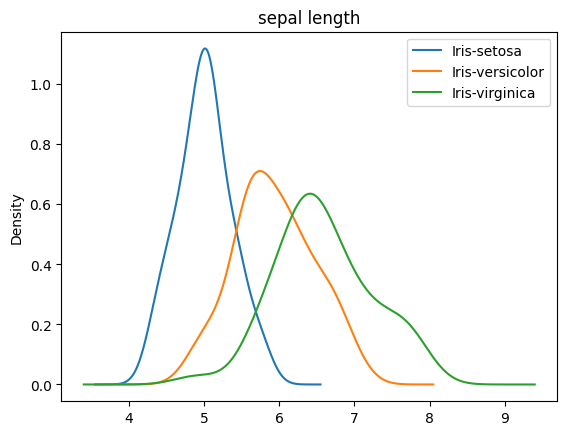

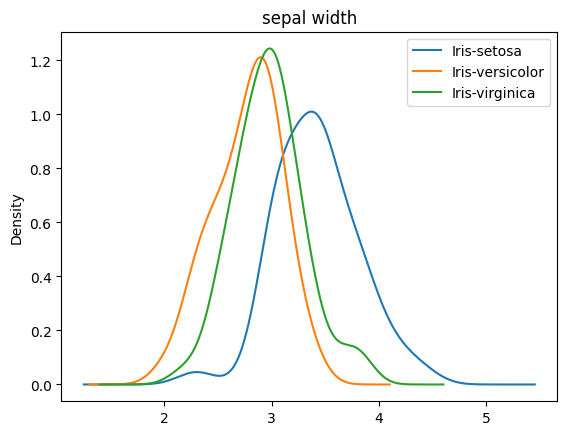

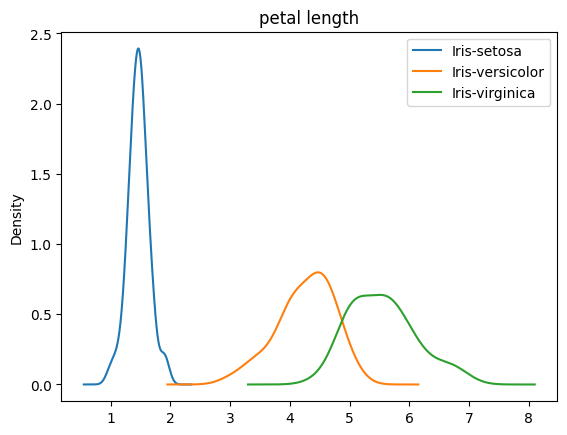

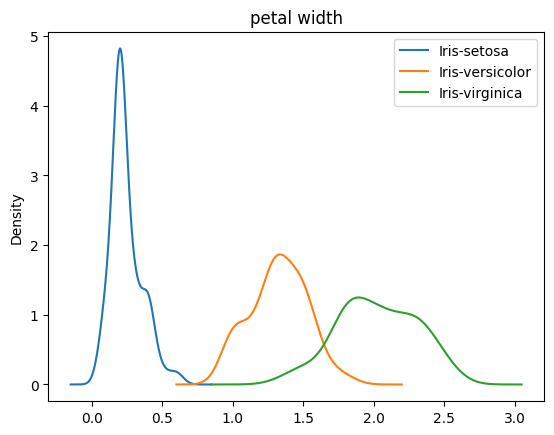

In [22]:
for var in X.columns:
    fg[var].plot(kind='kde')
    plt.title(var)
    plt.legend()
    plt.show()

Visto che le varianze non sono molto simili e sembrano proporzionali alle medie, provo a usare una trasformazione nonlineare per ottenere un modello migliore.

                 count      mean       std       min       25%       50%  \
class                                                                      
Iris-setosa       50.0 -1.498512  0.424457 -2.302585 -1.609438 -1.609438   
Iris-versicolor   50.0  0.270933  0.152821  0.000000  0.182322  0.262364   
Iris-virginica    50.0  0.696748  0.139274  0.336472  0.587787  0.693147   

                      75%       max  
class                                
Iris-setosa     -1.203973 -0.510826  
Iris-versicolor  0.405465  0.587787  
Iris-virginica   0.832909  0.916291  


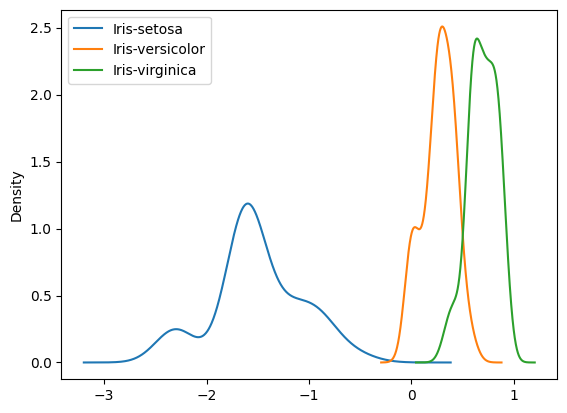

In [23]:
lpw = pd.DataFrame()
lpw['lpw'] = np.log(data['petal width'])
lpw['class'] = data['class']

lpwg = lpw.groupby('class')['lpw']

# lpwg = fg['petal width'].log()
print(lpwg.describe())
lpwg.plot(kind='kde')
plt.legend()
plt.show()

Il logaritmo e' troppo, usiamo la radice quadrata...

                 count      mean       std       min       25%       50%  \
class                                                                      
Iris-setosa       50.0  1.845943  0.103482  1.516575  1.767725  1.843909   
Iris-versicolor   50.0  1.661635  0.095667  1.414214  1.588967  1.673320   
Iris-virginica    50.0  1.722062  0.093150  1.483240  1.673320  1.732051   

                      75%       max  
class                                
Iris-setosa      1.916995  2.097618  
Iris-versicolor  1.732051  1.843909  
Iris-virginica   1.781811  1.949359  


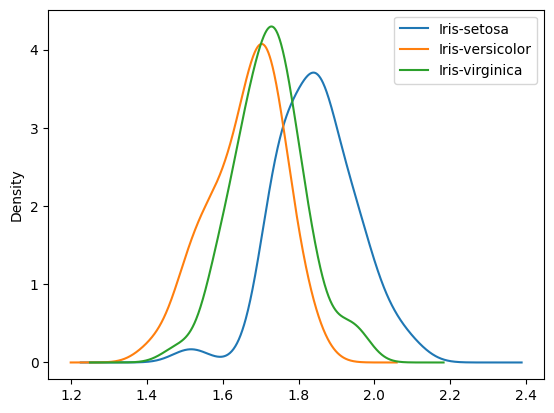

In [24]:
spw = pd.DataFrame()
spw['spw'] = np.sqrt(data['sepal width'])
spw['class'] = data['class']

spwg = spw.groupby('class')['spw']

print(spwg.describe())
spwg.plot(kind='kde')
plt.legend()
plt.show()

In [25]:
spwg.mean()

class
Iris-setosa        1.845943
Iris-versicolor    1.661635
Iris-virginica     1.722062
Name: spw, dtype: float64

In [26]:
spwg.std()

class
Iris-setosa        0.103482
Iris-versicolor    0.095667
Iris-virginica     0.093150
Name: spw, dtype: float64

In [27]:
# Calcolo la varianza within

Sw2 = spwg.var().mean() # media aritmetica, perché le numerosità sono uguali
Sw2

np.float64(0.009512460449952034)

In [ ]:
# Calcolo la varianza between

# Passo dall'identità delle devianze

n = len(data)
m = len(spwg)

deg_w = n - m
deg_y = n - 1
deg_b = m - 1

print(f'{n=}, {m=}, df Sw={deg_w}')

SSw = Sw2 * deg_w
SSy = spw['spw'].var() * deg_y
SSb = SSy - SSw
Sb2 = SSb / deg_b
Sy2 = SSy / deg_y

Sb = np.sqrt(Sb2)
Sw = np.sqrt(Sw2)
Sy = np.sqrt(Sy2)

print(f'{Sw=:g}, {Sy=:g}, {Sb=:g}')


n=150, m=3, df Sw=147
Sw=0.0975318, Sy=0.123732, Sb=0.664376


In [29]:
# Statistica del test

stat = Sb2 / Sw2
stat

np.float64(46.40178227292794)

In [30]:
# p-value del test

from scipy.stats import f

p_value = f.sf(stat, dfn=deg_b, dfd=deg_w)
p_value

np.float64(2.3902040551367803e-16)

Ora ripeto non a mano, ma con scipy e poi con ols.

In [31]:
from scipy.stats import f_oneway

f_oneway(*[x.values for (_, x) in spwg])

F_onewayResult(statistic=np.float64(46.401782272927974), pvalue=np.float64(2.3902040551367167e-16))

In [32]:
# La 'star' * trasforma una lista o tupla in un elenco di valori separati da virgole, che si possono passare ad una funzione.

print(*[x.values for (_, x) in spwg])

[1.87082869 1.73205081 1.78885438 1.76068169 1.8973666  1.97484177
 1.84390889 1.84390889 1.70293864 1.76068169 1.92353841 1.84390889
 1.73205081 1.73205081 2.         2.0976177  1.97484177 1.87082869
 1.94935887 1.94935887 1.84390889 1.92353841 1.8973666  1.81659021
 1.84390889 1.73205081 1.84390889 1.87082869 1.84390889 1.78885438
 1.76068169 1.84390889 2.02484567 2.04939015 1.76068169 1.78885438
 1.87082869 1.76068169 1.73205081 1.84390889 1.87082869 1.51657509
 1.78885438 1.87082869 1.94935887 1.73205081 1.94935887 1.78885438
 1.92353841 1.81659021] [1.78885438 1.78885438 1.76068169 1.51657509 1.67332005 1.67332005
 1.81659021 1.54919334 1.70293864 1.64316767 1.41421356 1.73205081
 1.4832397  1.70293864 1.70293864 1.76068169 1.73205081 1.64316767
 1.4832397  1.58113883 1.78885438 1.67332005 1.58113883 1.67332005
 1.70293864 1.73205081 1.67332005 1.73205081 1.70293864 1.61245155
 1.54919334 1.54919334 1.64316767 1.64316767 1.73205081 1.84390889
 1.76068169 1.51657509 1.73205081 1.58

In [33]:
data = np.sqrt(X) # In realtà non so se va bene anche per le altre variabili
data['class'] = y['class']
data = data.rename(columns={"class": "category"})
data = data.rename(columns={"petal length": "petal_length"})
data = data.rename(columns={"petal width": "petal_width"})
data = data.rename(columns={"sepal length": "sepal_length"})
data = data.rename(columns={"sepal width": "sepal_width"})
data

,sepal_length,sepal_width,petal_length,petal_width,category
0,2.258318,1.870829,1.183216,0.447214,Iris-setosa
1,2.213594,1.732051,1.183216,0.447214,Iris-setosa
2,2.167948,1.788854,1.140175,0.447214,Iris-setosa
3,2.144761,1.760682,1.224745,0.447214,Iris-setosa
4,2.236068,1.897367,1.183216,0.447214,Iris-setosa
...,...,...,...,...,...
145,2.588436,1.732051,2.280351,1.516575,Iris-virginica
146,2.509980,1.581139,2.236068,1.378405,Iris-virginica
147,2.549510,1.732051,2.280351,1.414214,Iris-virginica
148,2.489980,1.843909,2.323790,1.516575,Iris-virginica


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Così mette le dummy variable 0-1 come facciamo nella regressione e butta via la prima classe

print(ols('sepal_width ~ C(category)', data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     46.40
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.39e-16
Time:                        10:42:40   Log-Likelihood:                 137.81
No. Observations:                 150   AIC:                            -269.6
Df Residuals:                     147   BIC:                            -260.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [35]:
# Usando il contrast "Sum", i coefficienti stimati sono μ, α_1, α_2, ... α_m. Gli α_i hanno somma 0 e purtroppo non mostra α_1.

print(ols('sepal_width ~ C(category, Sum)', data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     46.40
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.39e-16
Time:                        10:46:56   Log-Likelihood:                 137.81
No. Observations:                 150   AIC:                            -269.6
Df Residuals:                     147   BIC:                            -260.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [37]:
ols('petal_width ~ C(category)', data=data).fit().params

Intercept                         0.483246
C(category)[T.Iris-versicolor]    0.665076
C(category)[T.Iris-virginica]     0.936853
dtype: float64

In [38]:
spwg.mean()

class
Iris-setosa        1.845943
Iris-versicolor    1.661635
Iris-virginica     1.722062
Name: spw, dtype: float64

In [39]:
global_avg = spwg.mean().mean()
global_avg

np.float64(1.7432132745335551)

In [40]:
spwg.mean() - global_avg

class
Iris-setosa        0.102730
Iris-versicolor   -0.081578
Iris-virginica    -0.021152
Name: spw, dtype: float64

In [41]:
ols('petal_width ~ C(category, Sum)', data=data).fit().params

Intercept                              1.017222
C(category, Sum)[S.Iris-setosa]       -0.533976
C(category, Sum)[S.Iris-versicolor]    0.131100
dtype: float64

In [42]:
from statsmodels.stats.anova import anova_lm

model = ols('petal_width ~ C(category, Sum)', data=data).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
"C(category, Sum)",2.0,23.231381,11.615690,1257.915219,3.428277e-93
Residual,147.0,1.357410,0.009234,NaN,NaN


In [43]:
import pingouin as pg

df = pg.read_dataset('anova2')
df

,Ss,Blend,Crop,Yield
0,1,Blend X,Wheat,123
1,2,Blend X,Wheat,156
2,3,Blend X,Wheat,112
3,4,Blend X,Wheat,100
4,5,Blend X,Corn,128
5,6,Blend X,Corn,150
6,7,Blend X,Corn,174
7,8,Blend X,Corn,116
8,9,Blend X,Soy,166
9,10,Blend X,Soy,178


In [44]:
dfg = df.groupby(['Blend', 'Crop'])['Yield']
dfg.describe()

count    mean        std    min     25%    50%     75%    max
Blend   Crop                                                                
Blend X Corn     4.0  142.00  25.560386  116.0  125.00  139.0  156.00  174.0
        Soy      4.0  171.00  14.764823  153.0  162.75  172.0  180.25  187.0
        Wheat    4.0  122.75  24.074537  100.0  109.00  117.5  131.25  156.0
Blend Y Corn     4.0  153.50  32.501282  120.0  129.00  153.5  178.00  187.0
        Soy      4.0  143.75  11.701140  131.0  137.75  142.5  148.50  159.0
        Wheat    4.0  140.25  24.635679  120.0  127.50  132.5  145.25  176.0

In [45]:
print(dfg.mean())

Blend    Crop 
Blend X  Corn     142.00
         Soy      171.00
         Wheat    122.75
Blend Y  Corn     153.50
         Soy      143.75
         Wheat    140.25
Name: Yield, dtype: float64


In [46]:
df.anova(dv="Yield", between=["Blend", "Crop"])

,Source,SS,DF,MS,F,p-unc,np2
0,Blend,2.041667,1,2.041667,0.003768,0.951730,0.000209
1,Crop,2736.583333,2,1368.291667,2.525235,0.107978,0.219105
2,Blend * Crop,2360.083333,2,1180.041667,2.177813,0.142223,0.194834
3,Residual,9753.250000,18,541.847222,NaN,NaN,NaN


In [47]:
model_2way = ols('Yield ~ C(Blend, Sum) * C(Crop, Sum)', data=df).fit()
print(model_2way.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     1.882
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.148
Time:                        10:52:37   Log-Likelihood:                -106.14
No. Observations:                  24   AIC:                             224.3
Df Residuals:                      18   BIC:                             231.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [48]:
print(anova_lm(model_2way))

                              df       sum_sq      mean_sq         F    PR(>F)
C(Blend, Sum)                1.0     2.041667     2.041667  0.003768  0.951730
C(Crop, Sum)                 2.0  2736.583333  1368.291667  2.525235  0.107978
C(Blend, Sum):C(Crop, Sum)   2.0  2360.083333  1180.041667  2.177813  0.142223
Residual                    18.0  9753.250000   541.847222       NaN       NaN


In [49]:
norep = dfg.mean()
norep

Blend    Crop 
Blend X  Corn     142.00
         Soy      171.00
         Wheat    122.75
Blend Y  Corn     153.50
         Soy      143.75
         Wheat    140.25
Name: Yield, dtype: float64

In [50]:
pd.DataFrame(norep)

Yield
Blend   Crop         
Blend X Corn   142.00
        Soy    171.00
        Wheat  122.75
Blend Y Corn   153.50
        Soy    143.75
        Wheat  140.25

In [51]:
norep.unstack()

Crop,Corn,Soy,Wheat
Blend,,,
Blend X,142.0,171.00,122.75
Blend Y,153.5,143.75,140.25


In [52]:
norep.reset_index()

,Blend,Crop,Yield
0,Blend X,Corn,142.00
1,Blend X,Soy,171.00
2,Blend X,Wheat,122.75
3,Blend Y,Corn,153.50
4,Blend Y,Soy,143.75
5,Blend Y,Wheat,140.25


In [53]:
# Pingouin non va bene: vuole le repliche per forza

norep.reset_index().anova(dv="Yield", between=["Blend", "Crop"])

/opt/homebrew/Caskroom/miniconda/base/envs/machine-learning/lib/python3.11/site-packages/pingouin/parametric.py:1093: RuntimeWarning: invalid value encountered in scalar divide
  ms_resid = ss_resid / df_resid


,Source,SS,DF,MS,np2
0,Blend,0.510417,1,0.510417,1.0
1,Crop,684.145833,2,342.072917,1.0
2,Blend * Crop,590.020833,2,295.010417,1.0
3,Residual,0.000000,0,NaN,NaN


In [54]:
model_norep = ols('Yield ~ C(Blend, Sum) + C(Crop, Sum)', data=norep.reset_index()).fit()
print(model_norep.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                 -0.157
Method:                 Least Squares   F-statistic:                    0.7736
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.606
Time:                        10:55:36   Log-Likelihood:                -22.279
No. Observations:                   6   AIC:                             52.56
Df Residuals:                       2   BIC:                             51.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/opt/homebrew/Caskroom/miniconda/base/envs/machine-learning/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [55]:
anova_lm(model_norep)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Blend, Sum)",1.0,0.510417,0.510417,0.001730,0.970600
"C(Crop, Sum)",2.0,684.145833,342.072917,1.159528,0.463064
Residual,2.0,590.020833,295.010417,NaN,NaN


In [56]:
anova_lm(ols('Yield ~ C(Crop, Sum)', data=norep.reset_index()).fit())

,df,sum_sq,mean_sq,F,PR(>F)
"C(Crop, Sum)",2.0,684.145833,342.072917,1.737789,0.315329
Residual,3.0,590.531250,196.843750,NaN,NaN


## Test del chi-quadro

In [57]:
lotto = pd.read_excel('archilotto_raw.xlsx', index_col=0)
lotto

,BA,BA.1,BA.2,BA.3,BA.4,CA,CA.1,CA.2,CA.3,CA.4,...,SUP.4,SUP.5,JOLLY,SUPERS,1° LOT SUP,2° LOT SUP,3° LOT SUP,4° LOT SUP,5° LOT SUP,6° LOT SUP
DATA,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-05,87.0,34.0,1.0,59.0,50.0,18.0,17.0,45.0,49.0,82.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-13,6.0,66.0,1.0,16.0,48.0,40.0,60.0,32.0,50.0,80.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-20,38.0,14.0,24.0,78.0,36.0,25.0,87.0,63.0,23.0,88.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1945-01-27,49.0,30.0,87.0,15.0,65.0,39.0,81.0,84.0,89.0,69.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-04,83.0,21.0,26.0,86.0,59.0,66.0,42.0,43.0,56.0,69.0,...,42.0,51.0,80.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-07,51.0,83.0,60.0,59.0,90.0,64.0,70.0,58.0,2.0,16.0,...,74.0,79.0,70.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-09,8.0,55.0,77.0,76.0,21.0,17.0,62.0,32.0,22.0,80.0,...,89.0,80.0,71.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
lotto = lotto.drop(index='NaT')
lotto = lotto[[col for col in lotto.columns if col.startswith('CA')]]
lotto

,CA,CA.1,CA.2,CA.3,CA.4
DATA,,,,,
1945-01-05,18.0,17.0,45.0,49.0,82.0
1945-01-13,40.0,60.0,32.0,50.0,80.0
1945-01-20,25.0,87.0,63.0,23.0,88.0
1945-01-27,39.0,81.0,84.0,89.0,69.0
1945-02-03,19.0,70.0,4.0,79.0,7.0
...,...,...,...,...,...
2010-12-04,66.0,42.0,43.0,56.0,69.0
2010-12-07,64.0,70.0,58.0,2.0,16.0
2010-12-09,17.0,62.0,32.0,22.0,80.0


In [59]:
lotto = pd.DataFrame(lotto, dtype=int)
lotto

,CA,CA.1,CA.2,CA.3,CA.4
DATA,,,,,
1945-01-05,18,17,45,49,82
1945-01-13,40,60,32,50,80
1945-01-20,25,87,63,23,88
1945-01-27,39,81,84,89,69
1945-02-03,19,70,4,79,7
...,...,...,...,...,...
2010-12-04,66,42,43,56,69
2010-12-07,64,70,58,2,16
2010-12-09,17,62,32,22,80


In [60]:
from scipy.stats import describe

vals = lotto.values.flatten()
describe(vals)

DescribeResult(nobs=22265, minmax=(np.int64(0), np.int64(90)), mean=np.float64(46.5820345834269), variance=np.float64(685.5867954470614), skewness=np.float64(-0.05072221578333324), kurtosis=np.float64(-1.2136170843854868))

In [61]:
np.sum(vals == 0)

np.int64(10)

In [62]:
vals = vals[vals > 0]

In [63]:
describe(vals)

DescribeResult(nobs=22255, minmax=(np.int64(1), np.int64(90)), mean=np.float64(46.60296562570209), variance=np.float64(684.9193764837199), skewness=np.float64(-0.0506846481536701), kurtosis=np.float64(-1.2136815818748647))

In [64]:
counts = np.histogram(vals, bins=90)
counts

(array([260, 214, 225, 247, 232, 244, 220, 248, 233, 239, 251, 239, 236,
        237, 271, 253, 223, 208, 233, 256, 222, 236, 261, 240, 210, 220,
        228, 255, 244, 250, 250, 264, 220, 222, 205, 248, 219, 230, 234,
        240, 253, 254, 246, 254, 220, 258, 264, 233, 232, 244, 251, 250,
        269, 245, 261, 263, 247, 254, 238, 247, 259, 235, 219, 255, 242,
        237, 244, 240, 267, 261, 258, 274, 256, 254, 252, 256, 276, 275,
        264, 286, 262, 258, 265, 285, 269, 264, 276, 280, 268, 268]),
 array([ 1.        ,  1.98888889,  2.97777778,  3.96666667,  4.95555556,
         5.94444444,  6.93333333,  7.92222222,  8.91111111,  9.9       ,
        10.88888889, 11.87777778, 12.86666667, 13.85555556, 14.84444444,
        15.83333333, 16.82222222, 17.81111111, 18.8       , 19.78888889,
        20.77777778, 21.76666667, 22.75555556, 23.74444444, 24.73333333,
        25.72222222, 26.71111111, 27.7       , 28.68888889, 29.67777778,
        30.66666667, 31.65555556, 32.64444444, 33.6333

In [65]:
counts = np.histogram(vals, bins=list(range(1, 92)))
counts

(array([260, 214, 225, 247, 232, 244, 220, 248, 233, 239, 251, 239, 236,
        237, 271, 253, 223, 208, 233, 256, 222, 236, 261, 240, 210, 220,
        228, 255, 244, 250, 250, 264, 220, 222, 205, 248, 219, 230, 234,
        240, 253, 254, 246, 254, 220, 258, 264, 233, 232, 244, 251, 250,
        269, 245, 261, 263, 247, 254, 238, 247, 259, 235, 219, 255, 242,
        237, 244, 240, 267, 261, 258, 274, 256, 254, 252, 256, 276, 275,
        264, 286, 262, 258, 265, 285, 269, 264, 276, 280, 268, 268]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91]))

In [66]:
obs, _ = counts
obs

array([260, 214, 225, 247, 232, 244, 220, 248, 233, 239, 251, 239, 236,
       237, 271, 253, 223, 208, 233, 256, 222, 236, 261, 240, 210, 220,
       228, 255, 244, 250, 250, 264, 220, 222, 205, 248, 219, 230, 234,
       240, 253, 254, 246, 254, 220, 258, 264, 233, 232, 244, 251, 250,
       269, 245, 261, 263, 247, 254, 238, 247, 259, 235, 219, 255, 242,
       237, 244, 240, 267, 261, 258, 274, 256, 254, 252, 256, 276, 275,
       264, 286, 262, 258, 265, 285, 269, 264, 276, 280, 268, 268])

In [67]:
len(obs)

90

In [68]:
int(sum(obs))

22255

In [69]:
n = len(vals)
n

22255

In [70]:
from scipy.stats import chisquare

chisquare(obs)

Power_divergenceResult(statistic=np.float64(118.9757357897102), pvalue=np.float64(0.01860041564730563))

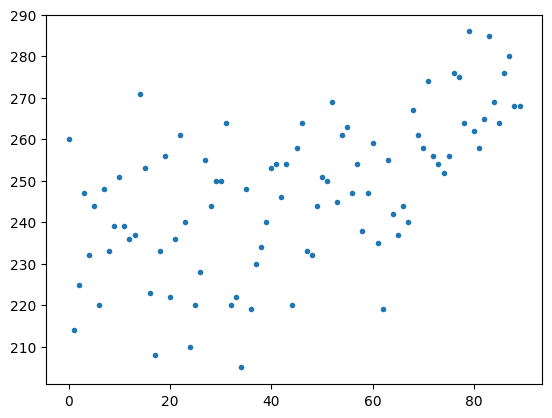

In [71]:
plt.plot(obs, '.')
# plt.ylim([0, 300])
plt.show()

In [72]:
counts2 = np.histogram(vals, bins=[0.5, 30.5, 60.5, 90.5])
counts2

(array([7135, 7315, 7805]), array([ 0.5, 30.5, 60.5, 90.5]))

In [73]:
chisquare(counts2[0])

Power_divergenceResult(statistic=np.float64(32.41518759829252), pvalue=np.float64(9.143899584010899e-08))

## Test di Gaussianità

In [74]:
sample = X[y['class']=='Iris-setosa']['sepal length']
sample

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length, dtype: float64

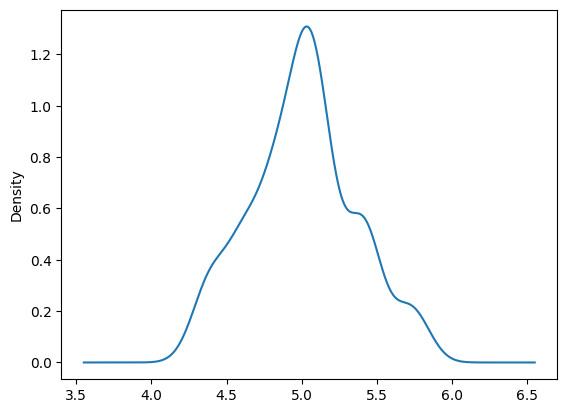

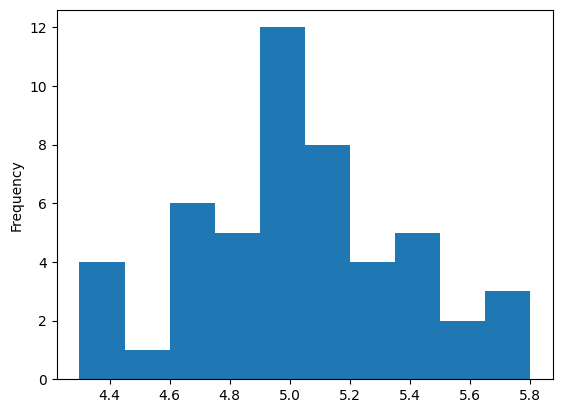

In [75]:
sample.plot(kind='kde', bw_method=0.3)
plt.show()
sample.plot(kind='hist')
plt.show()

In [76]:
mu = sample.mean()
sigma = sample.std()
(mu, sigma)

(np.float64(5.006), np.float64(0.35248968721345136))

In [77]:
k = 5

In [78]:
from scipy.stats import norm

di = norm(loc=mu, scale=sigma)
np.arange(1, k)/k

array([0.2, 0.4, 0.6, 0.8])

In [79]:
edges = di.ppf(np.arange(1, k)/k)
edges = np.array([0] + list(edges) + [10])
edges

array([ 0.        ,  4.70933719,  4.91669776,  5.09530224,  5.30266281,
       10.        ])

In [80]:
obsg, _ = np.histogram(sample, bins=edges)
obsg

array([11,  9,  8, 12, 10])

In [81]:
chisquare(obsg, ddof=2)

Power_divergenceResult(statistic=np.float64(1.0), pvalue=np.float64(0.6065306597126334))

Questo campione è compatibile con l'ipotesi di Gaussianità.